This notebook contains some basic concepts to apply the model selection techniques in machine learning.
I will try to give some over view here on K-Fold cross validation techniques and Grid search which are the part pf sklearn library. 
We will use K cross validation technoques to get the score of different classifier implemented on one data set to know how they perform and will then use Grid Search technique to get the best parameters for the best model that we choose based on the cross validation scores. 
The data set choosen here is Social Networking Ads dataset, which I found on the Kaggle dataset repositories. 

In [1]:
# libraries import 
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# reading the data set
data_set = pd.read_csv('../input/social-network-ad/Social_Network_Ads.csv')

In [3]:
# Analysis of the dataset 
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


As we can see that the dataset contains total of 5 columns and the columns namely USER_ID, Gender, Age and Estimated Salary are the independent attribtes here and the Purchased is the dependent attribute which we need to classify.

Now if we look at the attributes, 'Gender' is one of categorical type and if we want to use it in out machine learning algorithm as input than we have to process it further. The other attributes are of continous type and can be used as it is. 

In [4]:
# Plot
import plotly.express as px
fig = px.scatter_3d(data_set, x='Age', y= 'EstimatedSalary',z = 'Gender',
              color='Purchased', symbol='Purchased', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

If we see the above figure, we can say that the Gender is not having that much of information as it seems to be distributed equally for both the choices, so we will try to visualise the relationship between purchased choice and the Ahe and income of the users.

As we can see in the figure below, the choices are seperable in relation to the age and income. So for our analysis we will try to use the Age and Estimated SAlary as the only input attributes. 

In [5]:
fig = px.scatter(data_set, x='Age', y= 'EstimatedSalary',
              color='Purchased', symbol='Purchased', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [6]:
X = data_set.iloc[:,[2,3]].values
Y = data_set.iloc[:,4].values
# Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [7]:
# Preprocessing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Fold Cross Validation

As we are trying to learn, the model selection here in this section so, we will try to choose here two different classifiers

1) Logistic regression

2) Support Vector machine

and then using the cross validation score we will decide which algorithm to choose. 
Note: This can be esily deduced by analysing the above figure that logistic regression classifier will not work good on our dataset as the data doesnt seems to be linearly seperable but as we are trying to learn the method here to use cross validation score to decide the better models. The logistic regression model is just taken as one of the example here. 

In [8]:
# Applying the logistic regression classifier 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Applying the SVM 
from sklearn.svm import SVC
sv = SVC(kernel='rbf', random_state = 0)
sv.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

**Now we will apply the K-Fold Cross validation techniques to check which model is bettter for our dataset **

SVM : Mean of the accuracies is 90.053022 percent
SVM : the standard deviation of the accuracies is 6.388957 percent
log_Regression: Mean of the accuracies is 82.708194 percent
log_Regression: the standard deviation of the accuracies is 9.362431 percent


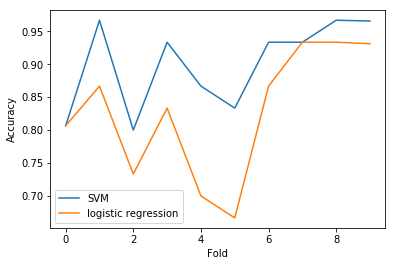

In [10]:
from sklearn.model_selection import cross_val_score
score_lr = cross_val_score(estimator= lr, X= X_train,y=Y_train,cv= 10, n_jobs= -1)
score_sv = cross_val_score(estimator= sv, X= X_train,y=Y_train,cv= 10, n_jobs= -1)


print('SVM : Mean of the accuracies is %2f percent' % (score_sv.mean()*100))
print('SVM : the standard deviation of the accuracies is %2f percent' % (score_sv.std()*100))

print('log_Regression: Mean of the accuracies is %2f percent' % (score_lr.mean()*100))
print('log_Regression: the standard deviation of the accuracies is %2f percent' % (score_lr.std()*100))

plt.plot(range(len(score_sv)), score_sv, label='SVM')
plt.plot(range(len(score_lr)), score_lr, label = 'logistic regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

The cross_validation scores shows that SVM is much better as compared to the Logistic regression model for our dataset which we already knew also. 

# Grid Search
Now since we know that the better model among the Logistic regression and the SVM is SVM, we will now use the grid search method to do the parameter tuning.
As in SVM we have different parameters, for example 'C' which is basically the penalty parameter and is used to avoid the overfiting of our model, what is the best value for C for our dataset is determined by Grid Search, apart from this for SVC we have different kernels, now which kernel will work best for our dataset is also determined using grid search. apart from this all the parameters of a particular algorithm can be optimised using the Grid Search. 

Lets apply this. 


In [11]:
from sklearn.model_selection import GridSearchCV
# dictionary of parameters used as an input to gridsearch 
parameters = [
    {'C':[1,10,100,1000], 'kernel': ['linear']},
    {'C':[1,10,100,1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}
]
# applying grid search
gscv = GridSearchCV(estimator = sv, 
                   param_grid= parameters,
                   scoring = 'accuracy', cv= 10, n_jobs= -1)
gscv = gscv.fit(X_train, Y_train)

best_acc = gscv.best_score_
print('best accuracy is %2f percent ' %(best_acc*100))
best_parameters = gscv.best_params_
print('best parameters are : ', best_parameters)

best accuracy is 90.333333 percent 
best parameters are :  {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Now we have got the best parameters for our model we can then train with this model here and can see the results

In [12]:
predictions_gridsearch = gscv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_gridsearch = confusion_matrix(Y_test, predictions_gridsearch)
print(cm_gridsearch)

[[64  4]
 [ 3 29]]


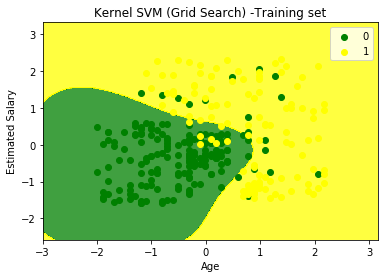

In [13]:
# Visualisation
# Training results 
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, gscv.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green','yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'yellow'))(i), label = j)
plt.title('Kernel SVM (Grid Search) -Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

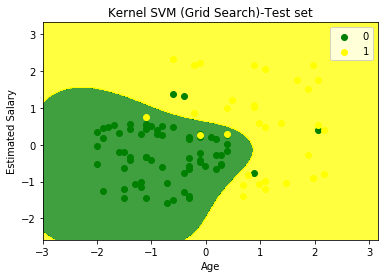

In [14]:

X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, gscv.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green','yellow'))(i), label = j)
plt.title('Kernel SVM (Grid Search)-Test set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Thank you for reading this kernel. If you found this kernel useful, I would really appreciate if you upvote it or leave a short comment below.**